Import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

Prepare data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
num_classes = 10
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170498071/170498071 [==============================] - 2s 0us/step


Setup model

In [32]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

Compile

In [33]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train

In [34]:
model.fit(x_train, y_train, batch_size=64, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
782/782 [==============================] - 154s 195ms/step - loss: 1.5155 - accuracy: 0.4470 - val_loss: 1.1715 - val_accuracy: 0.5783
Epoch 2/2
782/782 [==============================] - 151s 193ms/step - loss: 1.0698 - accuracy: 0.6189 - val_loss: 0.9810 - val_accuracy: 0.6547


Test

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 9s 30ms/step - loss: 0.9810 - accuracy: 0.6547
Test accuracy: 0.654699981212616


Visual Testing

In [36]:
import numpy as np
import matplotlib.pyplot as plt

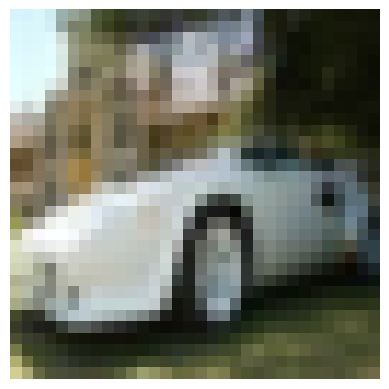

1/1 [==============================] - 0s 166ms/step
Actual label: automobile
Predicted: automobile


In [37]:
index = np.random.randint(0, x_test.shape[0])
image = x_test[index]
true_label = np.argmax(y_test[index])
plt.imshow(image)
plt.axis('off')
plt.show()
image = np.expand_dims(image, axis=0)
predictions = model.predict(image)
predicted_label = np.argmax(predictions)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Actual label:", class_names[true_label])
print("Predicted:", class_names[predicted_label])